<img style="float: left;" src="D2Klogo.png" width="20%"> 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Week 5 Bootstrap ###

In [40]:
### standard imports
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True

import random

# Bootstrap

In [41]:
# toy example to illustrate how bootstrap works
tb = pd.DataFrame(index=np.arange(3))
tb

Empty DataFrame
Columns: []
Index: [0, 1, 2]

In [42]:
# one bootstrap resample from the original table
# sample randomly, with replacement, the same sample size as original sample
boot_tb = tb.sample(3, replace=True)
boot_tb

Empty DataFrame
Columns: []
Index: [1, 1, 2]

## TX State Employees Income Data ##

[Data Source](https://salaries.texastribune.org/)

This database of compensation for Texas state employees is published by The Texas Tribune, a nonprofit and nonpartisan news organization. 

In [43]:
tx_salary = pd.read_csv("Texas_state_employees_salary.csv", skipinitialspace=True, parse_dates=True, low_memory=False)
tx_salary.head()

AGY                                               NAME  \
0  104  LEGISLATIVE BUDGET BOARD                      ...   
1  104  LEGISLATIVE BUDGET BOARD                      ...   
2  101  SENATE                                        ...   
3  101  SENATE                                        ...   
4  241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   

                         LASTNAME                       FIRSTNAME   MI  \
0  GILLIAM                         STACEY                            L   
1  NELSON                          DAVID                           NaN   
2  ROCHA                           MARIE                             S   
3  SCHMIDT                         EMILY                             M   
4  SPECIA JR                       JOHN                              J   

   JOBCLASS                                           JC TITLE  \
0  C160      COMMITTEE DIRECTOR                            ...   
1  P080      SENIOR BUDGET ADVISOR                         ...   
2      7103  LEG. SERVICE/MAINTENANCE                      ...   
3      7104  LEGISLATIVE PROFESSIONAL                      ...   
4  JD25      JUDGE, RETIRED                                ...   

              RACE              SEX                                   EMPTYPE  \
0  WHITE            FEMALE           URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
2  HISPANIC         FEMALE           URF - UNCLASSIFIED REGULAR FULL-TIME       
3  WHITE            FEMALE           URP - UNCLASSIFIED REGULAR PART-TIME       
4  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       

    HIREDT   RATE  HRSWKD  MONTHLY     ANNUAL  STATENUM  
0  11/1/17   0.00    20.0  7000.00   84000.00    339371  
1  11/1/17   0.00    20.0  8000.00   96000.00    193187  
2   5/1/03   0.00    41.0  3365.40   40384.80    152257  
3   4/1/20   0.00    20.0  3700.00   44400.00    949488  
4   2/1/20  75.96    29.0  9545.82  114549.84     59115

In [44]:
tx_salary.shape

(144727, 16)

In [45]:
tx_salary.columns

Index(['AGY', 'NAME', 'LASTNAME', 'FIRSTNAME', 'MI', 'JOBCLASS', 'JC TITLE',
       'RACE', 'SEX', 'EMPTYPE', 'HIREDT', 'RATE', 'HRSWKD', 'MONTHLY',
       'ANNUAL', 'STATENUM'],
      dtype='object')

In [46]:
tx_salary.dtypes

AGY            int64
NAME          object
LASTNAME      object
FIRSTNAME     object
MI            object
JOBCLASS      object
JC TITLE      object
RACE          object
SEX           object
EMPTYPE       object
HIREDT        object
RATE         float64
HRSWKD       float64
MONTHLY      float64
ANNUAL       float64
STATENUM       int64
dtype: object

In [47]:
# clean up some text columns that has extra space
for col in tx_salary.columns:
    # if the column has 'Object' type (which is string type in Pandas)
    if tx_salary.dtypes[col]=='O':
        tx_salary[col] = tx_salary[col].str.strip()

In [48]:
# who has the highest annual salary?
tx_salary[tx_salary['ANNUAL']==max(tx_salary['ANNUAL'])]

AGY                                               NAME LASTNAME  \
84628  542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS  WILLSON   

      FIRSTNAME   MI JOBCLASS                  JC TITLE   RACE   SEX  \
84628     JAMES  NaN     C542  CHIEF SCIENTIFIC OFFICER  WHITE  MALE   

                              EMPTYPE  HIREDT  RATE  HRSWKD  MONTHLY  \
84628  ERF - EXEMPT REGULAR FULL-TIME  3/1/16   0.0    40.0  46125.0   

         ANNUAL  STATENUM  
84628  553500.0    372291

In [49]:
# how much does the Governor make?
tx_salary[tx_salary['JC TITLE']=='GOVERNOR']

AGY                    NAME LASTNAME FIRSTNAME MI JOBCLASS  JC TITLE  \
4111  301  OFFICE OF THE GOVERNOR   ABBOTT   GREGORY  W     G030  GOVERNOR   

       RACE   SEX                         EMPTYPE   HIREDT  RATE  HRSWKD  \
4111  WHITE  MALE  ERF - EXEMPT REGULAR FULL-TIME  1/20/15   0.0    40.0   

      MONTHLY    ANNUAL  STATENUM  
4111  12812.5  153750.0    147698

In [50]:
# search for some job title using partial string match
tx_salary[tx_salary['JC TITLE'].str.match('ACTUARY')]

AGY                                  NAME           LASTNAME  \
17137   323             TEACHER RETIREMENT SYSTEM            INGLEBY   
18132   338            STATE PENSION REVIEW BOARD               KING   
30696   454         TEXAS DEPARTMENT OF INSURANCE              ARMON   
30708   454         TEXAS DEPARTMENT OF INSURANCE              AVILA   
30733   454         TEXAS DEPARTMENT OF INSURANCE         BEEMAN III   
30762   454         TEXAS DEPARTMENT OF INSURANCE               BOON   
30806   454         TEXAS DEPARTMENT OF INSURANCE          BURTON JR   
30871   454         TEXAS DEPARTMENT OF INSURANCE             CHILDS   
30991   454         TEXAS DEPARTMENT OF INSURANCE            ELLIOTT   
31023   454         TEXAS DEPARTMENT OF INSURANCE               FISK   
31048   454         TEXAS DEPARTMENT OF INSURANCE           FROELICH   
31052   454         TEXAS DEPARTMENT OF INSURANCE             FULTON   
31142   454         TEXAS DEPARTMENT OF INSURANCE             HEGGEN   
31145   454         TEXAS DEPARTMENT OF INSURANCE           HEMPHILL   
31167   454         TEXAS DEPARTMENT OF INSURANCE           HINTIKKA   
31171   454         TEXAS DEPARTMENT OF INSURANCE             HODGES   
31174   454         TEXAS DEPARTMENT OF INSURANCE             HOOVER   
31180   454         TEXAS DEPARTMENT OF INSURANCE              HUANG   
31207   454         TEXAS DEPARTMENT OF INSURANCE              JIANG   
31254   454         TEXAS DEPARTMENT OF INSURANCE                KIM   
31295   454         TEXAS DEPARTMENT OF INSURANCE             LESTER   
31299   454         TEXAS DEPARTMENT OF INSURANCE               LIAO   
31302   454         TEXAS DEPARTMENT OF INSURANCE                 LO   
31310   454         TEXAS DEPARTMENT OF INSURANCE              LOPEZ   
31351   454         TEXAS DEPARTMENT OF INSURANCE            MARKHAM   
31423   454         TEXAS DEPARTMENT OF INSURANCE              MOKRY   
31524   454         TEXAS DEPARTMENT OF INSURANCE     PATRICK-DOTSON   
31557   454         TEXAS DEPARTMENT OF INSURANCE  PONGPIPATTANACHAI   
31564   454         TEXAS DEPARTMENT OF INSURANCE           PROPHETE   
31604   454         TEXAS DEPARTMENT OF INSURANCE            RICHARD   
31658   454         TEXAS DEPARTMENT OF INSURANCE              RYDER   
31700   454         TEXAS DEPARTMENT OF INSURANCE                SHA   
31721   454         TEXAS DEPARTMENT OF INSURANCE               SIMS   
31779   454         TEXAS DEPARTMENT OF INSURANCE               TANG   
31876   454         TEXAS DEPARTMENT OF INSURANCE               WANG   
31877   454         TEXAS DEPARTMENT OF INSURANCE               WARD   
31917   454         TEXAS DEPARTMENT OF INSURANCE                 WU   
38497   529  HEALTH AND HUMAN SERVICES COMMISSION             CALDER   
41159   529  HEALTH AND HUMAN SERVICES COMMISSION                DAI   
45904   529  HEALTH AND HUMAN SERVICES COMMISSION           GONZALEZ   
46089   529  HEALTH AND HUMAN SERVICES COMMISSION            GORMLEY   
48833   529  HEALTH AND HUMAN SERVICES COMMISSION                HUA   
48839   529  HEALTH AND HUMAN SERVICES COMMISSION              HUANG   
48922   529  HEALTH AND HUMAN SERVICES COMMISSION         HUFSTEDLER   
50448   529  HEALTH AND HUMAN SERVICES COMMISSION             JOYNER   
52136   529  HEALTH AND HUMAN SERVICES COMMISSION            LO CHAU   
53945   529  HEALTH AND HUMAN SERVICES COMMISSION          MCANDREWS   
55372   529  HEALTH AND HUMAN SERVICES COMMISSION               MOON   
57271   529  HEALTH AND HUMAN SERVICES COMMISSION             OPALKO   
63922   529  HEALTH AND HUMAN SERVICES COMMISSION            STEGMAN   
64283   529  HEALTH AND HUMAN SERVICES COMMISSION              SUWUH   
65784   529  HEALTH AND HUMAN SERVICES COMMISSION              VACEK   
66226   529  HEALTH AND HUMAN SERVICES COMMISSION          VELAZQUEZ   
142539  327           EMPLOYEES RETIREMENT SYSTEM              DURAN   
142624  327           EMPLOYEES RETIREMENT SYSTE

In [51]:
# average annual salary of an actuary?
tx_salary[tx_salary['JC TITLE'].str.match('ACTUARY')]['ANNUAL'].mean()

93326.05963636364

In [52]:
# some minmum salary and work full 40hrs per week 
15 * 40 * 52

31200

In [53]:
# filter out part-time etc
# document your cleaning steps for reproducibility!
# hours per week >= 40 and annual salary >= 30000
tx_salary = tx_salary[(tx_salary['HRSWKD']>=40)&(tx_salary['ANNUAL']>=30000)]

In [54]:
tx_salary.shape

(125974, 16)

In [55]:
# let's further filter out to have only recent 
# convert HIREDT column to Pandas datetime type and extract year
tx_salary['HIREYR'] = pd.to_datetime(tx_salary['HIREDT']).dt.year
tx_salary.head()

AGY                                  NAME  LASTNAME  FIRSTNAME   MI  \
2  101                                SENATE     ROCHA      MARIE    S   
5  302        OFFICE OF THE ATTORNEY GENERAL   RUSSELL    SHANNON  NaN   
6  529  HEALTH AND HUMAN SERVICES COMMISSION  TERRAZAS     BRENDA  NaN   
7  320            TEXAS WORKFORCE COMMISSION    GUZMAN  MELISSA C  NaN   
8  454         TEXAS DEPARTMENT OF INSURANCE  WHELPLEY      JAMES    M   

  JOBCLASS                    JC TITLE      RACE     SEX  \
2     7103    LEG. SERVICE/MAINTENANCE  HISPANIC  FEMALE   
5     5541      CHILD SUPPORT OFFCR II     WHITE  FEMALE   
6      173  LICENSE AND PERMIT SPEC IV  HISPANIC  FEMALE   
7     1982           CONTRACT SPEC III     ASIAN  FEMALE   
8     1104          FINANCIAL EXAM III     WHITE    MALE   

                                EMPTYPE   HIREDT  RATE  HRSWKD  MONTHLY  \
2  URF - UNCLASSIFIED REGULAR FULL-TIME   5/1/03   0.0    41.0  3365.40   
5    CRF - CLASSIFIED REGULAR FULL-TIME  1/19/21   0.0    40.0  3333.33   
6    CRF - CLASSIFIED REGULAR FULL-TIME   6/1/21   0.0    40.0  3293.41   
7    CRF - CLASSIFIED REGULAR FULL-TIME   4/1/21   0.0    40.0  4400.00   
8    CRF - CLASSIFIED REGULAR FULL-TIME   2/1/21   0.0    40.0  5457.51   

     ANNUAL  STATENUM  HIREYR  
2  40384.80    152257    2003  
5  39999.96   1118805    2021  
6  39520.92    193274    2021  
7  52800.00   1273490    2021  
8  65490.12    980637    2021

In [19]:
# let's use the 2020 hire as our population
tx_salary_2020 = tx_salary[tx_salary['HIREYR']==20]
tx_salary_2020.shape

(14204, 17)

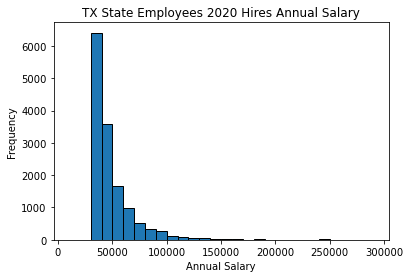

In [20]:
# make a plot of the population distribution
tx_bins = np.arange(10000, 300000, 10000)
tx_salary_2020['ANNUAL'].plot(kind='hist', bins=tx_bins)
plt.title('TX State Employees 2020 Hires Annual Salary')
plt.xlabel('Annual Salary');

In [21]:
# let's find the median annual salary
# two ways: use np.median or np.percentile with 50
pop_median = np.median(tx_salary_2020['ANNUAL'])
#pop_median = np.percentile(tx_salary_2020['ANNUAL'], 50)
pop_median

42000.0

## From now on, we are only allowed to use our_sample ##

In [22]:
# fix the random seed to reproduce the results
# this is sample without replacement, why?
random.seed(2021)
sample_size = 300
our_sample = tx_salary_2020.sample(sample_size)
our_sample.shape

(300, 17)

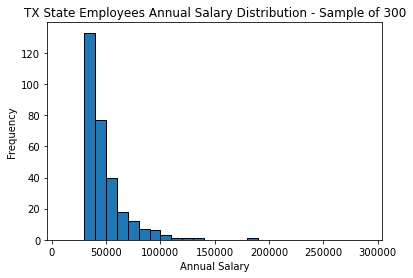

In [23]:
# make a histogram of the random sample
our_sample['ANNUAL'].plot(kind='hist', bins=tx_bins)
plt.title('TX State Employees Annual Salary Distribution - Sample of '+ str(sample_size));
plt.xlabel('Annual Salary');

In [24]:
# estimate median from our random sample
our_sample_est_median = np.percentile(our_sample['ANNUAL'], 50)
our_sample_est_median

42121.979999999996

In [25]:
# one bootstrap sample
# sample randomly from original sample, with replacement, the same sample size
random.seed(2021)
boot_sample = our_sample.sample(sample_size, replace=True)
boot_sample 

AGY                                          NAME     LASTNAME  \
14957   320                    TEXAS WORKFORCE COMMISSION     MORIARTY   
18677   401                     TEXAS MILITARY DEPARTMENT  CONSTANTINE   
136643  701                        TEXAS EDUCATION AGENCY     MITCHELL   
58727   529          HEALTH AND HUMAN SERVICES COMMISSION          POE   
15536   320                    TEXAS WORKFORCE COMMISSION        RIVAS   
...     ...                                           ...          ...   
130068  696          TEXAS DEPARTMENT OF CRIMINAL JUSTICE  SCHEXNAYDER   
110248  696          TEXAS DEPARTMENT OF CRIMINAL JUSTICE      DANIELS   
79018   530  DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES    SHIRATORI   
135019  696          TEXAS DEPARTMENT OF CRIMINAL JUSTICE     WILLIAMS   
4342    302                OFFICE OF THE ATTORNEY GENERAL     ALVARADO   

          FIRSTNAME   MI JOBCLASS                     JC TITLE      RACE  \
14957   ELIZABETH H  NaN      134     CUSTOMER SERVICE REP III  HISPANIC   
18677     TAMMORROW    D     1572       PROGRAM SPECIALIST III     WHITE   
136643        MEGAN    R      823      EDUCATION SPECIALIST IV     WHITE   
58727        ANDREW    B     1558            PROJECT MANAGER I     WHITE   
15536       MARTA C  NaN      132      CUSTOMER SERVICE REP II  HISPANIC   
...             ...  ...      ...                          ...       ...   
130068       DEMYJA    J     4503             CORREC OFFCR III     BLACK   
110248        KEVIN    G     4504           CORREC  OFFICER IV     WHITE   
79018         YUKIE  NaN      608              RESEARCH SPEC V     ASIAN   
135019        ADINA    R     4504           CORREC  OFFICER IV     BLACK   
4342         ALFRED    A     9996  SERGEANT, TEXAS AG'S OFFICE  HISPANIC   

           SEX                             EMPTYPE    HIREDT  RATE  HRSWKD  \
14957   FEMALE  CRF - CLASSIFIED REGULAR FULL-TIME    5/4/20   0.0    40.0   
18677   FEMALE  CRF - CLASSIFIED REGULAR FULL-TIME    9/8/20   0.0    40.0   
136643  FEMALE  CRF - CLASSIFIED REGULAR FULL-TIME   12/1/20   0.0    40.0   
58727     MALE  CRF - CLASSIFIED REGULAR FULL-TIME   4/27/20   0.0    40.0   
15536   FEMALE  CRF - CLASSIFIED REGULAR FULL-TIME   6/15/20   0.0    40.0   
...        ...                                 ...       ...   ...     ...   
130068  FEMALE  CRF - CLASSIFIED REGULAR FULL-TIME  10/26/20   0.0    40.0   
110248    MALE  CRF - CLASSIFIED REGULAR FULL-TIME   8/24/20   0.0    40.0   
79018   FEMALE  CRF - CLASSIFIED REGULAR FULL-TIME   9/21/20   0.0    40.0   
135019  FEMALE  CRF - CLASSIFIED REGULAR FULL-TIME   10/5/20   0.0    40.0   
4342      MALE  CRF - CLASSIFIED REGULAR FULL-TIME    4/1/20   0.0    40.0   

        MONTHLY    ANNUAL  STATENUM  HIREYR  
14957   2575.91  30910.92   1053791      20  
18677   4292.00  51504.00    295761      20  
136643  6065.75  72789.00   1298468      20  
58727   5000.00  60000.00    762227      20  
15536   2500.00  30000.00     97661      20  
...         ...       ...       ...     ...  
130068  3019.84  36238.08   1287131      20  
110248  3284.27  39411.24    356031      20  
79018   5166.58  61998.96   1125630      20  
135019  3284.27  39411.24   1287386      20  
4342    6059.25  72711.00   1260680      20  

[300 rows x 17 columns]

In [26]:
# median from the bootstrap resample
np.percentile(boot_sample['ANNUAL'], 50)

43120.32

In [27]:
# A function to generate many bootstrap median from original sample
def bootstrap_median(original_sample, label, rep=2000):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = []
    n = original_sample.shape[0]
    for i in np.arange(rep):
        bootstrap_sample = original_sample.sample(n, replace=True)
        new_median = np.percentile(bootstrap_sample[label], 50)
        medians = np.append(medians, new_median)
        
    return medians

In [28]:
# generate 2000 bootstrap median estimates
random.seed(2023)
boot_medians = bootstrap_median(our_sample, 'ANNUAL', 10000)
boot_medians

array([42121.98, 43120.32, 40458.12, ..., 41570.16, 42000.  , 41974.86])

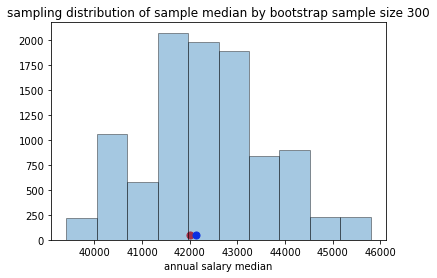

In [29]:
# plot the histogram for the 2000 bootstrap median estimates
med_bins = np.arange(80000, 125001, 2500)
plt.hist(boot_medians, alpha=0.4)
#plt.hist(boot_medians, bins=med_bins, alpha=0.4);

# plot the true population median (with 14204 data) as red dot
plt.scatter(pop_median, 50, color='red', s=50)

# plot the original sample median (with 300 samples) as blue doc
plt.scatter(our_sample_est_median, 50, color="blue", s=50)
plt.title('sampling distribution of sample median by bootstrap sample size '+ str(sample_size))
plt.xlabel('annual salary median');

# in reality you don't know the truth (the red dot)
# you try to estimate the red dot with the sample of 300 data points

## Bootstrap Confidence Interval

In [30]:
# left cut-off of the 2.5% of your histogram
left = np.percentile(boot_medians, 2.5)
left

40074.36

In [31]:
# right cut-off of the 97.5% of your histogram
right = np.percentile(boot_medians, 97.5)
right

45000.0

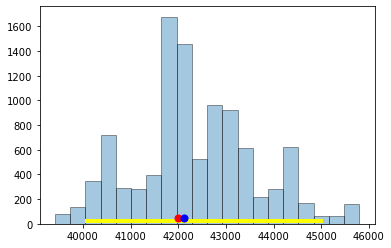

In [32]:
plt.hist(boot_medians, bins=20, alpha=0.4)

# plot the a yellow line between the left and right cut-off
# the yellow line covers the "middle 95% chunk" of the histogram
plt.plot([left, right], [20, 20], color='yellow', lw=4, zorder=1)
# plot the red and blue dot again, remember what they are?
plt.scatter(pop_median, 50, color='red', s=50, zorder=2);
plt.scatter(our_sample_est_median, 50, color="blue", s=50, zorder=2);

In [33]:
# this is your 95% bootstrap confidence interval
# a good estimate of the population median 
confidence_interval = [left, right]
confidence_interval

[40074.36, 45000.0]

Now do the bootstrap process multiple times to generate many CIs: 
1. take one random sample of 300 from the population, 
2. make 2000 bootstrap resamples based on that random sample,
3. use the middle 95% of the bootstrap medians as our confidence interval
4. repeat 1, 2, 3 multiple times. (100 times here)


In [34]:
# THE BIG SIMULATION: This one takes a long time!!!
# Generate 100 different bootstrap confidence intervals (CI)
# Each bootstrap CI are based on 2000 bootstrap samples

random.seed(2023)
rep = 100
left_ends = []
right_ends = []

for i in np.arange(rep):
    first_sample = tx_salary_2020.sample(sample_size, replace=False)
    medians = bootstrap_median(first_sample, 'ANNUAL')
    left_ends = np.append(left_ends, np.percentile(medians, 2.5))
    right_ends = np.append(right_ends, np.percentile(medians, 97.5))

In [35]:
# organize the 100 intervals as a dataframe
intervals = pd.DataFrame(
    {'Left': left_ends,
    'Right': right_ends}
)    

In [36]:
intervals

Left     Right
0   39411.24  43563.54
1   39520.92  43040.64
2   39411.24  42799.92
3   39520.92  44082.00
4   40503.84  45799.80
..       ...       ...
95  39411.24  43040.64
96  39411.24  42560.82
97  39999.96  43553.40
98  42000.00  45799.80
99  39466.08  45137.22

[100 rows x 2 columns]

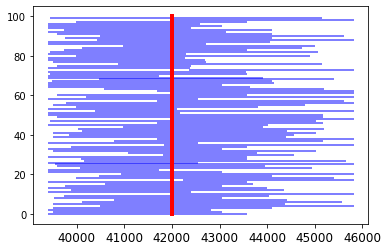

In [37]:
# plot the 100 confidence intervals as 100 horizontal line stacking on each other
for i in np.arange(rep):
    left = intervals.loc[i,'Left']
    right = intervals.loc[i,'Right']
    plt.plot([left, right], [i, i], color='blue', lw=2, zorder=1, alpha=0.5)

# plot the population median as a red vertical line 
plt.plot([pop_median, pop_median], [0, rep], color='red', lw=4, zorder=2)
plt.xticks(fontsize=12);

In [38]:
# this calculates how many intervals actually contain the truth (the red vertical line)
good = intervals[(intervals['Left']<pop_median)&(intervals['Right']>pop_median)].shape[0]

In [39]:
# this should be roughly 95 out of 100
good

92